#  Data Science Project

---

Dataset : NYC Collisions\
Rows: 2,38,420\
Columns: 18

---

# Import Required Libraries
* The beginning of  of Data Analysis starts with finding relevant data.
* Once the data is gathered , it is now clean and filtered by filling missing alues , remove unwanted  / excess information and removing extreme values.
* To do all this , we use programming languages such as Python or R ,etc.
* The first  step is to import required libraries.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy import stats

## Import the Dataset File
After importing the required libraries , it's time to import our dataset on which we will perform data cleaning.

In [12]:
Dataset=pd.read_excel(r'dsc project nyc.xlsx')

Dataset=pd.DataFrame(Dataset)
display(Dataset)


,1,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,NaN,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,NaN,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


# Data Cleaning


---
To clean the whole dataset we need to find the abnormalities in data like nulll / empty data , extreme values , unwanted data ,etc.\
Let's follow the steps one by one.\
 First we will find all the missing values.


In [13]:
Dataset.isnull().sum()

1                           0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64


Sometimes the programming language only counts NaN as an empty value whereas
in reality there may be other kinds of null values like:


1.   N/a
2.  na
and many more...

To ensure that we find all the missing values we will have to specify theese values and pass them as a parameter while loading the dataset file.


In [14]:
missing_value=["N/a","na",np.nan,"NaN","Unspecified"]
Dataset=pd.read_excel(r'dsc project nyc.xlsx',na_values=missing_value)
Dataset=pd.DataFrame(Dataset)
display(Dataset)

,1,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,NaN,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,NaN,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,NaN,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,NaN,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,NaN,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


In [15]:
Dataset.isnull().sum()

1                           0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor     59549
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

# Data Filtering


---


Looking at the output we can understand which columns have how many null values.\
There are basically 3 ways in which we handle these empty values:

1.   Ignore Them: If the column containing empty values is not important or it isn't going to be used in any Statistical way ,then you can ignore them.
2.   Fill The Values: In some columns like "country" when no input is given , then generally a default value is used to fill the empty cells. eg. India
3.   Delete the Entire Row: If the column is of high importance and you are unable to fill the missing value then it would be best to remove the entire row as it can change the outcome.






## Filling The Missing Value


---



*   We are not going to ignore any missing value as we will use all the columns to derive statistical reuslt.
*   So the next step is to try to fil them with the missing values.

*   We will not fill all the columns' empty values but only the Cross Street Column's empty values  because it is of less importance.


In [16]:
Dataset['Cross Street'].fillna('Unknown Street Avenue',inplace=True)
Dataset.isnull().sum()

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_5468\1098533452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['Cross Street'].fillna('Unknown Street Avenue',inplace=True)


1                          0
Date                       0
Time                       0
Borough                 7197
Street Name              363
Cross Street               0
Latitude               22323
Longitude              22323
Contributing Factor    59549
Vehicle Type               0
Persons Injured            1
Persons Killed             0
Pedestrians Injured        0
Pedestrians Killed         0
Cyclists Injured           0
Cyclists Killed            0
Motorists Injured          0
Motorists Killed           0
dtype: int64

## Removing The Missing Values


---



*  All the columns containing missing values now are of high importance and cannot be filled with default values as they may change the outcome.
*   So , we will remove all the records(rows) which contain these null values.



In [17]:
Dataset.dropna(inplace=True)
display(Dataset)

,1,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unknown Street Avenue,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
5,4380963,2021-01-01,18:45:00,Manhattan,Harlem River Drive,Unknown Street Avenue,40.848630,-73.927620,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Passenger Vehicle,0.0,0,0,0,0,0,0,0
6,4381116,2021-01-01,04:51:00,Brooklyn,Junius Street,Unknown Street Avenue,40.660090,-73.900550,Other Vehicular,Passenger Vehicle,0.0,0,0,0,0,0,0,0
7,4382500,2021-01-01,16:14:00,Brooklyn,Morgan Avenue,Unknown Street Avenue,40.705807,-73.931760,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
11,4380830,2021-01-01,06:15:00,Brooklyn,Moultrie Street,Unknown Street Avenue,40.727700,-73.946090,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238413,4619859,2023-04-09,18:40:00,Queens,Hassock Street,Unknown Street Avenue,40.610160,-73.754234,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,Unknown Street Avenue,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,Unknown Street Avenue,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


# Exploratory Data Analysis


---



*   After filtering the dataset we finally got pure data.
*   Now it's time to Do Exploratory Data Analysis.

*   It includes all the different statisical methods and ways in which we can find patterns , trends or insights within the dataset to get deeper knowledge.
*   All statistical techniques can be divided into two broad categories:


1.   Descriptive Statistics
2.   Inferential Statistics








## 1)  Descriptive Statistics


---


Descriptive statistics are used to describe the characteristics or features of a
dataset.We can use descriptive
statistics to describe both an entire population or an individual sample.
It generally includes the following 4 points:

1.   Distribution

*   Frequency Distribution

2.   Central tendency

*   Mean
*   Median
*   Mode

3.   Variability

*   Range
*   Variance
*   Standard Deviation
*   Quartiles
*   IQR


4.   Measure Of Shape


*   Skewness
*   Kurtosis

We will do Descriptive Analysis on 2 data columns namely 'Persons Injured' & 'Motorists Injured' and then try to find the patterns and relationships between them.

In [18]:
pimean=Dataset['Persons Injured'].mean()
pimedian=Dataset['Persons Injured'].median()
pimode=Dataset['Persons Injured'].mode()
pisd=Dataset['Persons Injured'].std()
pivar=Dataset['Persons Injured'].var()
piskew=Dataset['Persons Injured'].skew()
pikurt=Dataset['Persons Injured'].kurtosis()

mimean=Dataset['Motorists Injured'].mean()
mimedian=Dataset['Motorists Injured'].median()
mimode=Dataset['Motorists Injured'].mode()
misd=Dataset['Motorists Injured'].std()
mivar=Dataset['Motorists Injured'].var()
miskew=Dataset['Motorists Injured'].skew()
mikurt=Dataset['Motorists Injured'].kurtosis()

print("Persons Injured Statistics: ")
print(f"Mean: {pimean}")
print(f"Median: {pimedian}")
print(f"Mode: {pimode}")
print(f"Standard Deviation: {pisd}")
print(f"Variance: {pivar}")
print(f"Skewness: {piskew}")
print(f"Kurtosis: {pikurt}")

print("\n\nMotorists Injured Statistics: ")

print(f"Mean: {mimean}")
print(f"Median: {mimedian}")
print(f"Mode: {mimode}")
print(f"Standard Deviation: {misd}")
print(f"Variance: {mivar}")
print(f"Skewness: {miskew}")
print(f"Kurtosis: {mikurt}")

Persons Injured Statistics: 
Mean: 0.52056572028137
Median: 0.0
Mode: 0    0.0
Name: Persons Injured, dtype: float64
Standard Deviation: 0.8242855881868896
Variance: 0.6794467308926065
Skewness: 3.25792855111023
Kurtosis: 37.81871819530217


Motorists Injured Statistics: 
Mean: 0.36684278166500073
Median: 0.0
Mode: 0    0
Name: Motorists Injured, dtype: int64
Standard Deviation: 0.7987411579201877
Variance: 0.6379874373556823
Skewness: 3.864120623046924
Kurtosis: 42.55956968734759



As you can infer from the result that the value of Kurtosis is very high compared to standard values.

*   This indicates that there are outliers present within the data.
*   Therefore it is necessary to find the outliers and remove them.


In [19]:
summary=Dataset.describe()
print(summary)

                  1                           Date       Latitude  \
count  1.610690e+05                         161069  161069.000000   
mean   4.501145e+06  2022-02-11 13:51:38.495675904      40.725509   
min    4.273061e+06            2021-01-01 00:00:00      40.500896   
25%    4.441303e+06            2021-07-24 00:00:00      40.670040   
50%    4.500683e+06            2022-02-04 00:00:00      40.716198   
75%    4.561361e+06            2022-09-01 00:00:00      40.780150   
max    4.619988e+06            2023-04-09 00:00:00      40.912167   
std    6.901996e+04                            NaN       0.080893   

           Longitude  Persons Injured  Persons Killed  Pedestrians Injured  \
count  161069.000000    161069.000000   161069.000000        161069.000000   
mean      -73.916970         0.520566        0.002378             0.078078   
min       -74.254960         0.000000        0.000000             0.000000   
25%       -73.962530         0.000000        0.000000             

From the summary , we can conclude that the main reason for high value of kurtosis lies in the max / higher values of both the columns.

*  To check if it caused by 1 or more than 1 records, we will first remove and
check the record containing max value.
*   If there still remains a huge diffference between the mean and the max value, then that means that there are more than 1 outlier values.



In [20]:
column_to_check = 'Persons Injured'
value_to_check = 34

Dataset = Dataset[Dataset[column_to_check] != value_to_check]
summary=Dataset.describe()
print(summary)

                  1                           Date       Latitude  \
count  1.610680e+05                         161068  161068.000000   
mean   4.501144e+06  2022-02-11 13:47:53.509325312      40.725509   
min    4.273061e+06            2021-01-01 00:00:00      40.500896   
25%    4.441303e+06            2021-07-24 00:00:00      40.670040   
50%    4.500681e+06            2022-02-04 00:00:00      40.716198   
75%    4.561360e+06            2022-09-01 00:00:00      40.780151   
max    4.619988e+06            2023-04-09 00:00:00      40.912167   
std    6.901954e+04                            NaN       0.080893   

           Longitude  Persons Injured  Persons Killed  Pedestrians Injured  \
count  161068.000000    161068.000000   161068.000000        161068.000000   
mean      -73.916971         0.520358        0.002378             0.078079   
min       -74.254960         0.000000        0.000000             0.000000   
25%       -73.962533         0.000000        0.000000             

As you can see fromn the summary that after removing the max value ,there still remains a huge gap between the mean andf the max value of the column.

Hence, we can say that there are multiple outliers involved in the data.

You can also cross check it by again finding the value of their kurtosis.

In [21]:
print(f"Kurtosis: {pikurt}")
print(f"Kurtosis: {mikurt}")

Kurtosis: 37.81871819530217
Kurtosis: 42.55956968734759


Next , we will find the range in which these outliers vary\
For that , we will use techniques like IQR

In [22]:
#IQR
Q1 = Dataset['Persons Injured'].quantile(0.25)
Q3 = Dataset['Persons Injured'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = Dataset[(Dataset['Persons Injured'] < Q1 - threshold * IQR) | (Dataset['Persons Injured'] > Q3 + threshold * IQR)]

print("Outliers:")
print(outliers)

Outliers:
              1       Date      Time   Borough                 Street Name  \
57      4380763 2021-01-01  03:07:00    Queens  Brooklyn Queens Expressway   
108     4380756 2021-01-01  06:30:00    Queens              Van Wyck Expwy   
132     4380813 2021-01-01  01:05:00    Queens           Laurelton Parkway   
138     4380839 2021-01-01  06:50:00     Bronx     Major Deegan Expressway   
263     4381592 2021-01-02  22:46:00     Bronx            Cross Bronx Expy   
...         ...        ...       ...       ...                         ...   
238233  4619171 2023-04-08  10:10:00  Brooklyn                Belt Parkway   
238276  4619557 2023-04-09  21:55:00  Brooklyn               Wilson Avenue   
238289  4619738 2023-04-09  13:20:00     Bronx               Jerome Avenue   
238327  4619680 2023-04-09  16:00:00    Queens                  108 Street   
238355  4619534 2023-04-09  06:15:00    Queens               Myrtle Avenue   

                 Cross Street   Latitude  Longitude  

From the above result we conclude that the range of outliers present in both columns starts from 3.\
So, we will remove all the data records in which the value of these columns is equal to or greater than 3.

In [23]:
specified_value = 3

filtered_dataset = Dataset[Dataset['Persons Injured'] < specified_value]
display(filtered_dataset)
pikurt=filtered_dataset['Persons Injured'].kurtosis()
print(f"Kurtosis: {pikurt}")
mikurt=filtered_dataset['Motorists Injured'].kurtosis()
print(f"Kurtosis: {mikurt}")


,1,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unknown Street Avenue,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
5,4380963,2021-01-01,18:45:00,Manhattan,Harlem River Drive,Unknown Street Avenue,40.848630,-73.927620,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Passenger Vehicle,0.0,0,0,0,0,0,0,0
6,4381116,2021-01-01,04:51:00,Brooklyn,Junius Street,Unknown Street Avenue,40.660090,-73.900550,Other Vehicular,Passenger Vehicle,0.0,0,0,0,0,0,0,0
7,4382500,2021-01-01,16:14:00,Brooklyn,Morgan Avenue,Unknown Street Avenue,40.705807,-73.931760,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
11,4380830,2021-01-01,06:15:00,Brooklyn,Moultrie Street,Unknown Street Avenue,40.727700,-73.946090,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238413,4619859,2023-04-09,18:40:00,Queens,Hassock Street,Unknown Street Avenue,40.610160,-73.754234,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,Unknown Street Avenue,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,Unknown Street Avenue,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


Kurtosis: 0.12489370834166058
Kurtosis: 2.575408652902559


Finally, we get the filtered dataeset with the required Kurtosis values.

## 2)  Inferential Statistics


---


Inferential statistics focus on making
generalisations about a larger population based on a representative sample of
that population.\
 Because inferential statistics focuses on making predictions
(rather than stating facts) its results are usually in the form of a probability.\
It generally includes the following points:

1.   Parameteric Test

*   T test
2.   Non- Parameteric Test

*   Spearman Rank-Order Correlation:

3.   Hypothesis Testing
4.   ANOVA








### Sample


---

A sample is a subset of a larger population chosen to represent it in research or analysis. Sampling involves selecting this subset to ensure it accurately reflects the population. Samples are used in various fields to draw conclusions about populations, and the quality of these inferences depends on the representativeness of the sample chosen.

Samples are used when:

● The population is too large to collect data.\
● The data collected is not reliable.\
● The population is hypothetical and is unlimited in size.

The tests related to finding the p values are basically done based on the sample data because in real life we are unable to find the whole dataset . So, we will take the first 2000 rows as a sample data for the following tests.

### 2.1)  Hypothesis Testing


---



1. **Formulation of Hypotheses**:
   - Null Hypothesis (H0): There is no relationship between the number of persons injured and the number of motorists injured.
   - Alternative Hypothesis (H1): There is a relationship between the number of persons injured and the number of motorists injured.

2. **Selection of Test Statistic**:
   - Depending on the type of relationship being investigated (e.g., correlation, difference in means), an appropriate test statistic such as correlation coefficient (for correlation) or t-test (for difference in means) would be selected.

3. **Specification of Significance Level**:
   - A significance level (α) is chosen to determine the threshold for accepting or rejecting the null hypothesis. Commonly used values include α = 0.05 or α = 0.01.
   - We select  α = 0.05.

4. **Calculation of Test Statistic and P-Value**:
   - Using the chosen test statistic (e.g., correlation coefficient), the test is conducted on the sample data to compute the observed test statistic value. From this, the p-value is determined.

5. **Decision Rule and Conclusion**:
   - If the p-value is less than or equal to the chosen significance level (α), the null hypothesis is rejected, indicating a significant relationship between the number of persons injured and the number of motorists injured. Conversely, if the p-value is greater than α, there is insufficient evidence to reject the null hypothesis, suggesting no significant relationship between the variables.

### 2.2) Spearman's rank-order correlation


---

Spearman's rank-order correlation is a non-parametric method assessing the correlation between variables, regardless of data distribution. It measures the strength of the monotonic relationship between variables, suitable for both continuous and ordinal data.

In this test, the p-value indicates the probability of observing a correlation coefficient as extreme as the computed one, assuming no correlation exists. A low p-value (< alpha) signifies significant correlation, warranting rejection of the null hypothesis, while a high p-value (> alpha) suggests no significant correlation. Thus, the p-value distinguishes between statistically significant correlation and chance.

In [24]:
#  Spearman correlation coefficient
subset_df = filtered_dataset.head(2000).copy()
spearman_corr, p_value = stats.spearmanr(subset_df['Persons Injured'], subset_df['Motorists Injured'])
print("Spearman correlation coefficient:", spearman_corr)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant Spearman correlation between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant Spearman correlation between the variables.")


Spearman correlation coefficient: 0.7512789572563903
P-value: 0.0
Reject the null hypothesis. There is a significant Spearman correlation between the variables.


### 2.3)  Hypothesis Result:


---


Based on the result obtained:
- Spearman Correlation Coefficient: 0.7512789572563903
- P-value: 0.0

The p-value is lower than the chosen significance level (α = 0.05), indicating strong evidence to reject the null hypothesis.

Therefore, we conclude that **there is a significant Spearman correlation** between the number of persons injured and the number of motorists injured. In other words, there is a meaningful relationship between these two variables, suggesting that as the number of persons injured increases, the number of motorists injured also tends to increase.

### 2.4)  T test


---

The t-test is used to compare means between two groups, while the p-value quantifies the strength of evidence against the null hypothesis in hypothesis testing. If the p-value is smaller than the significance level (usually 0.05), it suggests significant evidence against the null hypothesis, leading to its rejection. Conversely, a larger p-value indicates weaker evidence, failing to reject the null hypothesis.

Note: This test is for finding relations between different groups within the same column and it is not suitable for our main test between the columns 'Persons Injured' and 'Motorists Injured'

eg. Study of heights in Male and Female. Here , the Male and Female represent 2 different groups from the same column Gender.


In [25]:
#T test
group1 =filtered_dataset[filtered_dataset['Contributing Factor'] == 'Driver Inattention/Distraction']['Persons Injured']
group2 = filtered_dataset[filtered_dataset['Contributing Factor'] == 'Cell Phone (hand-Held)']['Persons Injured']

t_stat, p_value = stats.ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.6091121340869822
P-value: 0.5424527728953745


Based on the above information,  if there was a Hyptothesis Testing on a statement saying "The main cause for Driver Inattention/Distraction is related to Cell Phone(hand-Held)" then based on the p- value we will fail to reject the null hypothesis.

That means that there is no such relation present statistically and our hypothesis is false.

### 2.5)  ANOVA


---


ANOVA (Analysis of Variance) compares means of three or more groups to detect significant differences among them. The F-statistic tests the null hypothesis that all group means are equal, with a large F-statistic indicating differences between at least one pair of groups. Calculated as the ratio of between-group variance to within-group variance, the F-statistic provides insight into group mean variability.\
Here, the Anova test is performed on borough consists of  5 groups.
*   **Null Hypothesis (H0):** There is no significant difference in the mean number of
persons injured across different boroughs.
*   **Alternative Hypothesis (H1):** There is a significant difference in the mean number of persons injured across different boroughs.

### P-value in ANOVA:

In ANOVA, the p-value is a critical measure that evaluates the likelihood of observing such an extreme F-statistic under the assumption of no differences in means between groups. A low p-value (< alpha, typically 0.05) signifies significant variability between group means, suggesting at least one group mean differs significantly. Conversely, a high p-value (> alpha) indicates insufficient evidence to reject the null hypothesis, implying no significant differences between group means. \

Therefore, the p-value is crucial in identifying statistically significant differences in group means, guiding whether to reject or fail to reject the null hypothesis regarding differences in the mean number of persons injured across different boroughs.

In [26]:
#  ANOVA test
data = subset_df[['Borough', 'Persons Injured']]

# Perform one-way ANOVA test
anova_result = stats.f_oneway(*[group['Persons Injured'] for name, group in data.groupby('Borough')])

# Print ANOVA test result
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Interpret the results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in the number of persons injured across different boroughs.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of persons injured across different boroughs.")



ANOVA F-statistic: 0.9825120574358066
ANOVA p-value: 0.41581708082519
Fail to reject the null hypothesis. There is no significant difference in the number of persons injured across different boroughs.


#  Machine Learning:


---


Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models to enable computers to learn and improve their performance on a specific task without being explicitly programmed. It is used to analyze and interpret complex data, recognize patterns, and make predictions or decisions based on the information provided. Machine learning finds applications across various fields such as healthcare, finance, marketing, and more, where it helps automate tasks, optimize processes, and uncover insights from large datasets.

## Regression Analysis


---


Regression analysis is a statistical method used in **machine learning**  to understand the relationship between independent variables and a dependent variable. It helps in predicting outcomes, identifying patterns, and uncovering significant predictors within datasets. This technique is fundamental for making predictions, forecasting, and understanding relationships in data.
## Coefficients:

In linear regression, coefficients represent the impact of independent variables on the dependent variable. For example, a coefficient of 0.2 for Latitude suggests a 0.2 increase in Persons Injured for each unit rise in Latitude, holding other factors steady. Conversely, a coefficient of -0.1 for Longitude implies a 0.1 decrease in Persons Injured for each unit increase in Longitude, keeping other variables constant.

## Mean Squared Error (MSE):


Mean Squared Error (MSE) assesses the accuracy of regression models by measuring the average squared difference between actual and predicted values. A lower MSE indicates closer predictions to actual outcomes, reflecting a better model fit. In this context, MSE quantifies the average discrepancy between actual and predicted numbers of Persons Injured based on Latitude and Longitude.

\
Note: This test is generally performed between a Dependent variable (Persons Injured) and an Independent variable ('Latitude', 'Longitude').

In [27]:
# Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create a subset DataFrame containing the first 1000 rows
subset_df = filtered_dataset.head(2000).copy()
# Select relevant columns for regression analysis
X = subset_df[['Latitude', 'Longitude']]  # Independent variables
y = subset_df['Persons Injured']          # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients
print("Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)


Mean Squared Error: 0.3472448375431668
Coefficients: [-0.09621413  0.35021738]
Intercept: 30.185292738041614



*   The regression analysis reveals that Longitude has a positive influence on the dependent variable that for every one-unit increase in Longitude, there is a predicted increase of approximately 0.35 units in Persons Injured, all other variables held constant.

*   Conversely, Latitude exhibits a negative influence, as indicated by its coefficient of approximately -0.096. For every one-unit increase in Latitude, there is a predicted decrease of approximately 0.096 units in Persons Injured, assuming all other variables remain constant.
*   The intercept value of approximately 30.185 represents the baseline prediction for Persons Injured when all independent variables are set to zero.

*   Additionally, the mean squared error (MSE) value of 0.347 indicates the average squared difference between the model's predictions and the actual values of Persons Injured.
*   Overall, this analysis showcases the utilization of machine learning techniques, particularly linear regression, to understand and predict the outcome variable based on the provided features.









# Visualizng the Data

---


After all the different types of analysis are finished, it is time to gather those findings and present them in a way that can be interpreted and understood easily.

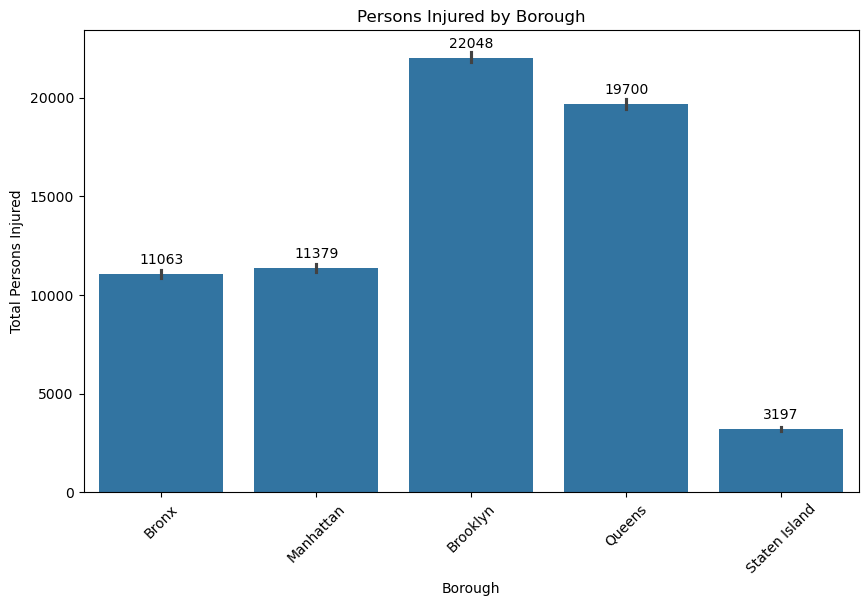

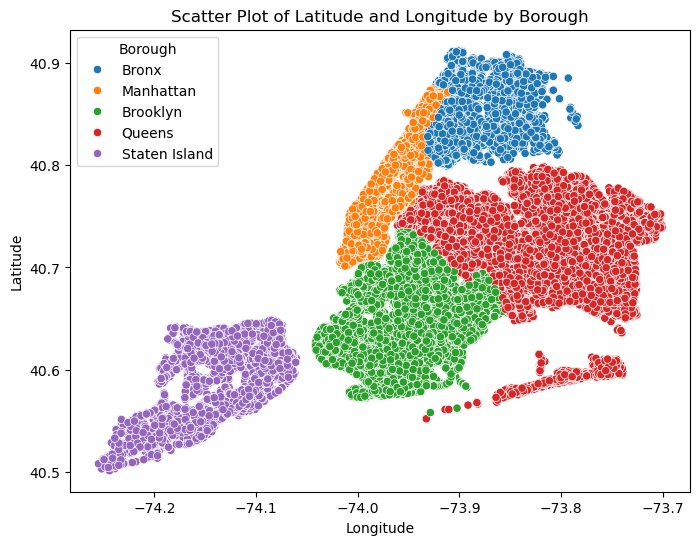

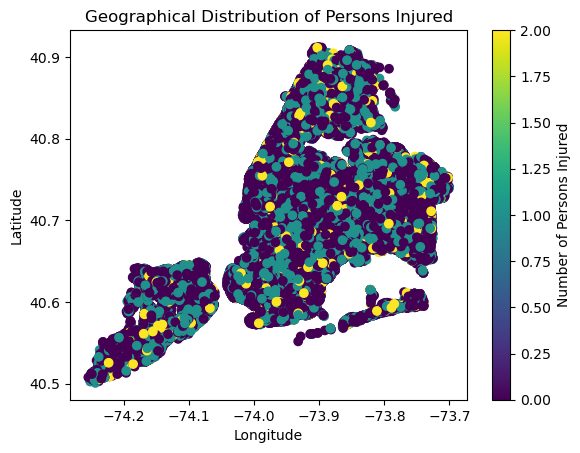

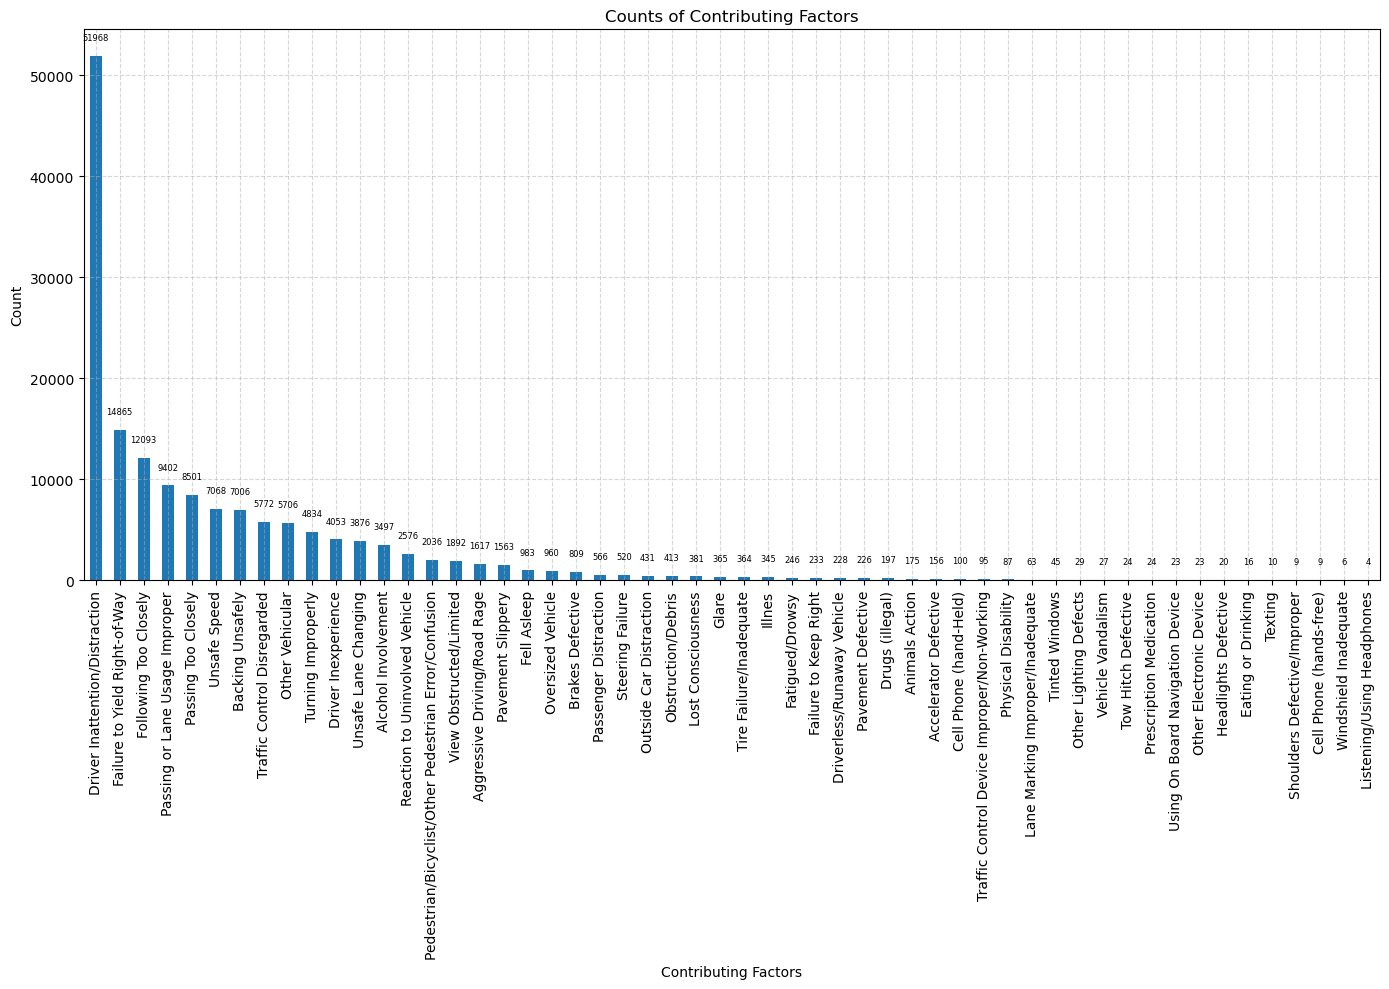

Correlation between Persons Injured and Motorists Injured: 0.791381374717846


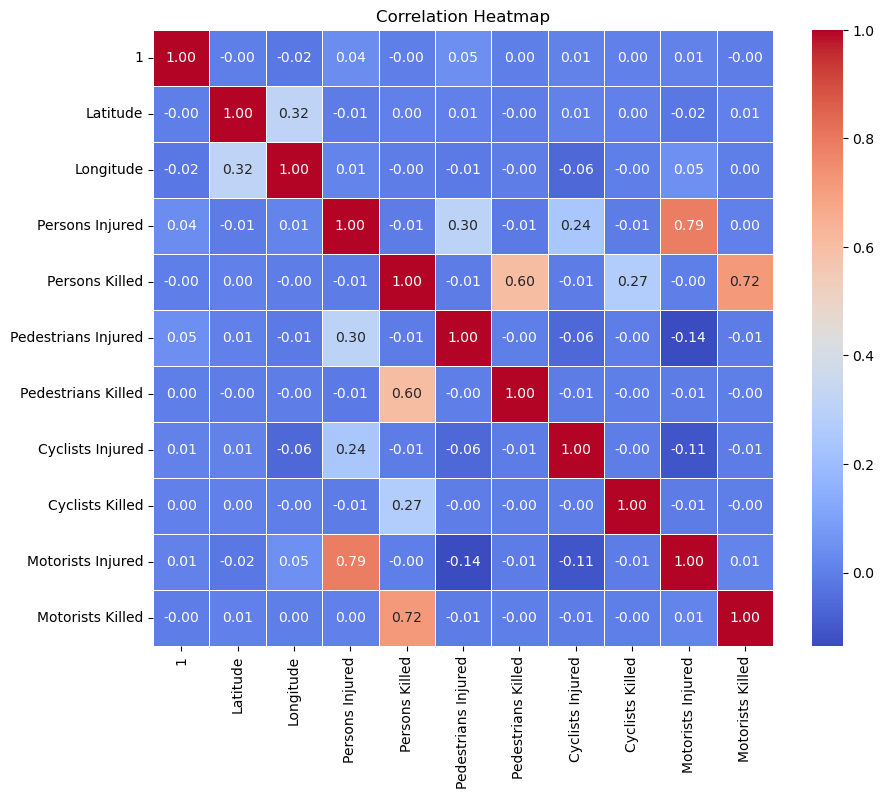

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_5468\392033373.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Date'] = pd.to_datetime(filtered_dataset['Date'])
C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_5468\392033373.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Year'] = filtered_dataset['Date'].dt.year


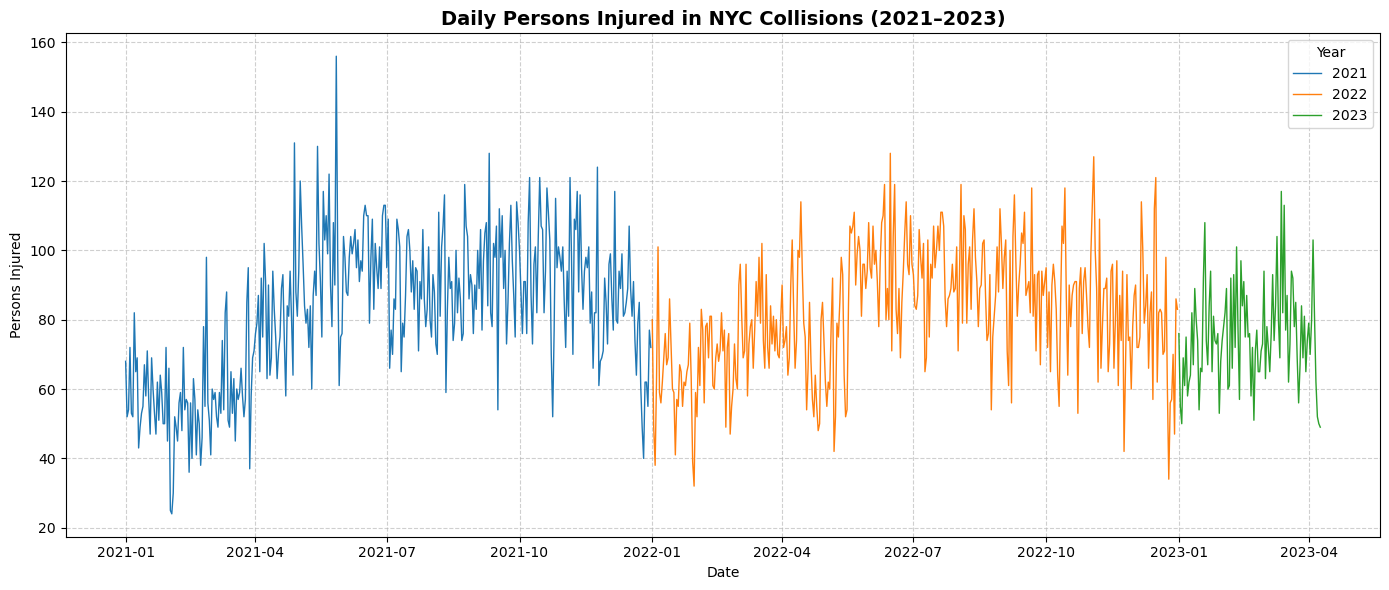

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_5468\392033373.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Date'] = pd.to_datetime(filtered_dataset['Date'])
C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_5468\392033373.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['MONTH'] = filtered_dataset['Date'].dt.month


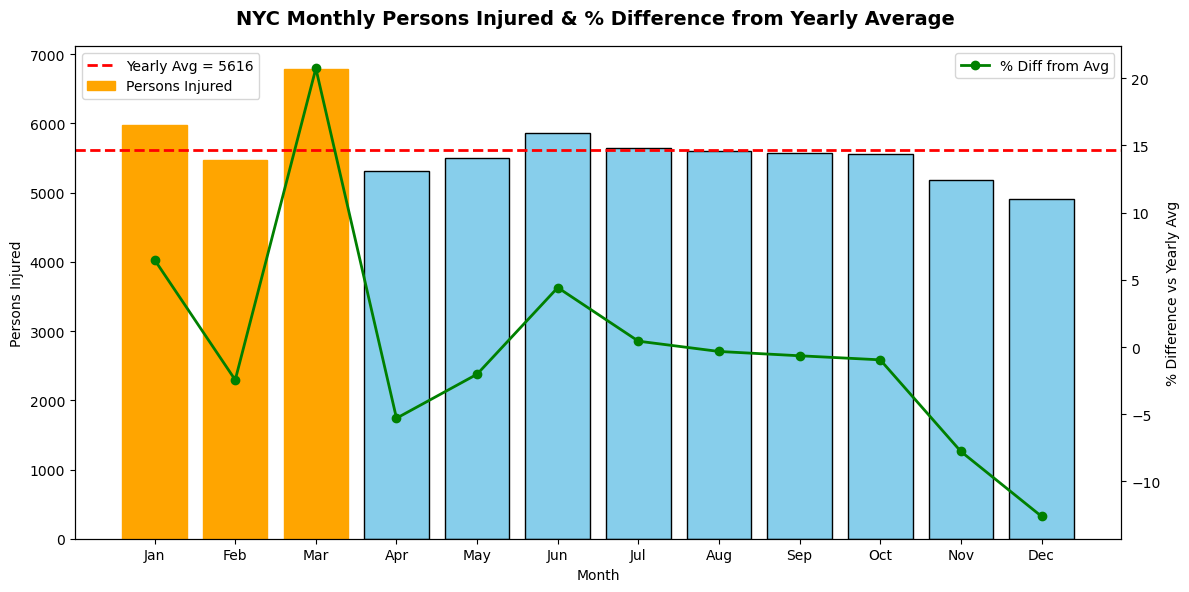

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Borough wise person injured
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_dataset, x='Borough', y='Persons Injured', estimator=sum, linewidth=0)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.title('Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Persons Injured')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Scatter plot for latitude and longitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=filtered_dataset, hue='Borough')
plt.title('Scatter Plot of Latitude and Longitude by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.show()

# Plot 3: Scatterplot for Persons Injured Geographically
plt.scatter(filtered_dataset['Longitude'], filtered_dataset['Latitude'], c=filtered_dataset['Persons Injured'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Persons Injured')
plt.colorbar(label='Number of Persons Injured')
plt.show()

import matplotlib.pyplot as plt

# Plot 4: Bargraph of Contributing Factors
contributing_factors_counts = filtered_dataset['Contributing Factor'].value_counts()
plt.figure(figsize=(14, 10))
contributing_factors_counts.plot(kind='bar')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.title('Counts of Contributing Factors')
plt.xlabel('Contributing Factors')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 5: Heatmap of correlations
correlation = filtered_dataset['Persons Injured'].corr(filtered_dataset['Motorists Injured'])
print("Correlation between Persons Injured and Motorists Injured:", correlation)
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = filtered_dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Plot 6: Time series plot for persons injured
filtered_dataset['Date'] = pd.to_datetime(filtered_dataset['Date'])
filtered_dataset['Year'] = filtered_dataset['Date'].dt.year
daily_injuries = filtered_dataset.groupby(['Date', 'Year'])['Persons Injured'].sum().reset_index()
plt.figure(figsize=(14,6))

for year in daily_injuries['Year'].unique():
    yearly_data = daily_injuries[daily_injuries['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Persons Injured'], label=str(year), linewidth=1)

plt.title("Daily Persons Injured in NYC Collisions (2021–2023)", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Persons Injured")
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



# Plot 7: NYC Monthly Persons Injured
filtered_dataset['Date'] = pd.to_datetime(filtered_dataset['Date'])
filtered_dataset['MONTH'] = filtered_dataset['Date'].dt.month
injured_counts = filtered_dataset.groupby('MONTH')['Persons Injured'].sum().sort_index()
yearly_avg_injured = injured_counts.mean()
percent_diff_injured = ((injured_counts - yearly_avg_injured) / yearly_avg_injured) * 100
fig, ax1 = plt.subplots(figsize=(12,6))
bars = ax1.bar(injured_counts.index, injured_counts.values, color="skyblue", edgecolor="black", label="Persons Injured")

for i, month in enumerate(injured_counts.index):
    if month in [1,2,3]:
        bars[i].set_color("orange")

ax1.axhline(y=yearly_avg_injured, color="red", linestyle="--", linewidth=2, label=f"Yearly Avg = {yearly_avg_injured:.0f}")
ax1.set_xlabel("Month")
ax1.set_ylabel("Persons Injured")
ax1.set_xticks(range(1,13))
ax1.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

ax2 = ax1.twinx()
ax2.plot(injured_counts.index, percent_diff_injured, color="green", marker="o", linewidth=2, label="% Diff from Avg")
ax2.set_ylabel("% Difference vs Yearly Avg")

fig.suptitle("NYC Monthly Persons Injured & % Difference from Yearly Average", fontsize=14, fontweight="bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.tight_layout()
plt.show()







# Conclusion


---



From the graphs we can be conclude the following points:

1.   Highest number of collisions were seen in Brooklyn (22,048) followed by Queens(19,700)
2.   The main contributing factor for collision was Driver Inattention / Distraction
3.   Although the area of Brooklyn is smaller than that of Queens, more casualties and accidents happened there , leading to a suspicion on the traffic management system and roads of Brooklyn.
4.   Major spikes are seen in the summer months, indicating that more people per day are injured during this period, with the highest single-day spike occurring in May. However, when looking at monthly totals, the first three months of the year **(Jan–Mar)** record the highest overall number of injuries, with **March** leading among them with **+20% above average, the highest month (~6,800)**.

5.   By testing the hypothesis and by looking at the heatmap, it can be concluded that there is a significant relationship between Persons Injured and Motorists injured indicating that a signifacnt number of the people having injures are motorists. This leads to the question of safety for motorists.

6. Policy recommendations including targeted awareness campaigns should be generated for stricter mobile-use enforcement and optimized traffic signal planning.







